# Download full text from PubMed Central

In [1]:
import concurrent.futures
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

sys.path.append("../python/extraction")

from utils import request_fulltext

# pmids = open("../pmids.txt").readlines()
csv_file = "../assets/pubmed_search_results.csv"
df = pd.read_csv(csv_file)
pmids = df["PMID"].tolist()
pmids = [str(pmid).strip() for pmid in pmids]

In [2]:

success_count = 0
failure_count = 0

def process_pmid(pmid):
    global success_count, failure_count
    try:
        request_fulltext(pmid)
        success_count += 1
        return True
    except Exception as e:
        print(f"Error processing PMID {pmid}: {str(e)}")
        failure_count += 1
        return False

# Use ThreadPoolExecutor for parallelization
with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
    results = list(
        tqdm(
            executor.map(process_pmid, pmids),
            total=len(pmids),
            desc="Downloading full texts",
        )
    )

print(f"Successful downloads: {success_count}")
print(f"Failed downloads: {failure_count}")


Error processing PMID 30127430: Expecting value: line 1 column 2 (char 1)Error processing PMID 30799021: Expecting value: line 1 column 2 (char 1)

Error processing PMID 38096817: Expecting value: line 1 column 2 (char 1)
Error processing PMID 30721681: Expecting value: line 1 column 2 (char 1)
Error processing PMID 37552951: Expecting value: line 1 column 2 (char 1)
Error processing PMID 37308660: Expecting value: line 1 column 2 (char 1)
Error processing PMID 35134357: Expecting value: line 1 column 2 (char 1)
Error processing PMID 38262414: Expecting value: line 1 column 2 (char 1)
Error processing PMID 35944481: Expecting value: line 1 column 2 (char 1)
Error processing PMID 28858625: Expecting value: line 1 column 2 (char 1)
Error processing PMID 32810456: Expecting value: line 1 column 2 (char 1)
Error processing PMID 29784759: Expecting value: line 1 column 2 (char 1)
Error processing PMID 38402616: Expecting value: line 1 column 2 (char 1)
Error processing PMID 25459405: Expect

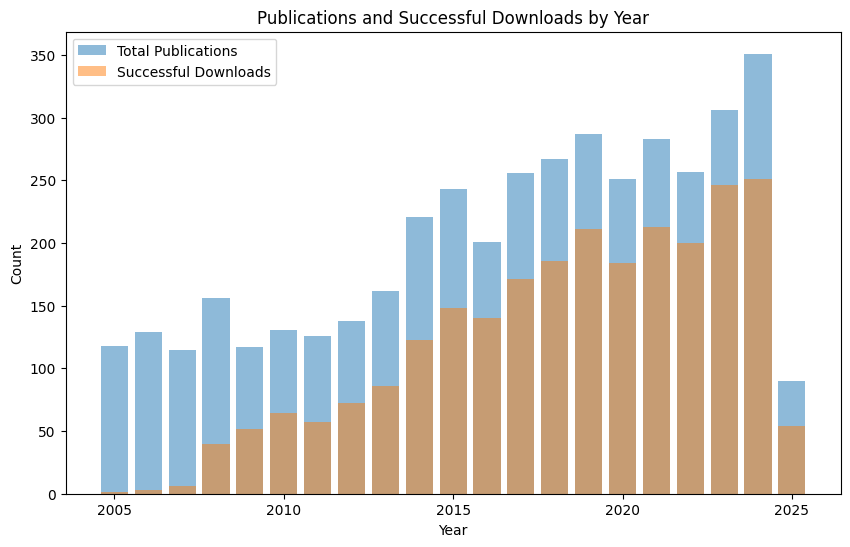

In [ ]:
# Check year coverage and success year coverage
df["year"] = df["Publication Year"].astype(int)

plt.figure(figsize=(10, 6))

# Plot total publications per year
year_counts = df["year"].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values, alpha=0.5, label='Total Publications')

# Plot successful downloads per year
files = os.listdir("../assets/full_texts")
files = [file.split(".")[0] for file in files]

def is_success(pmid):
    return str(pmid) in files

df["success"] = df["PMID"].apply(is_success)
success_by_year = df[["Publication Year", "success"]].groupby("Publication Year").sum()
plt.bar(success_by_year.index, success_by_year["success"], alpha=0.5, label='Successful Downloads')

plt.title("Publications and Successful Downloads by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.show()


In [7]:
# Add the full text path to the dataframe, if it exists
df["full_text_path"] = df["PMID"].apply(lambda x: f"assets/full_texts/{x}.json" if os.path.exists(f"../assets/full_texts/{x}.json") else None)
df.head()

,PMID,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Date,PMCID,NIHMS ID,DOI,year,success,full_text_path
0,38360946,A neuron-glia lipid metabolic cycle couples da...,"Haynes PR, Pyfrom ES, Li Y, Stein C, Cuddapah ...",Nat Neurosci. 2024 Apr;27(4):666-678. doi: 10....,Haynes PR,Nat Neurosci,2024,2024/02/15,PMC11001586,NaN,10.1038/s41593-023-01568-1,2024,True,assets/full_texts/38360946.json
1,30799021,Chemoconnectomics: Mapping Chemical Transmissi...,"Deng B, Li Q, Liu X, Cao Y, Li B, Qian Y, Xu R...",Neuron. 2019 Mar 6;101(5):876-893.e4. doi: 10....,Deng B,Neuron,2019,2019/02/26,NaN,NaN,10.1016/j.neuron.2019.01.045,2019,False,None
2,30721681,Connectomics: Arrested Development,"Triphan T, Thum AS.",Curr Biol. 2019 Feb 4;29(3):R90-R92. doi: 10.1...,Triphan T,Curr Biol,2019,2019/02/06,NaN,NaN,10.1016/j.cub.2018.11.069,2019,False,None
3,30819546,The Mechanosensitive Ion Channel Piezo Inhibit...,"Song Y, Li D, Farrelly O, Miles L, Li F, Kim S...",Neuron. 2019 Apr 17;102(2):373-389.e6. doi: 10...,Song Y,Neuron,2019,2019/03/02,PMC6487666,NIHMS1015665,10.1016/j.neuron.2019.01.050,2019,True,assets/full_texts/30819546.json
4,34696825,Mapping the fly's 'brain in the brain',Heinze S.,Elife. 2021 Oct 26;10:e73963. doi: 10.7554/eLi...,Heinze S,Elife,2021,2021/10/26,PMC8547947,NaN,10.7554/eLife.73963,2021,True,assets/full_texts/34696825.json


In [8]:
# Drop the year and success columns, and save the dataframe
df.drop(columns=["year", "success"])
df.to_csv("../assets/pubmed_search_results.csv", index=False)